# Aula 2 - Bootcamp DataScience 

## Analise Exploratória

### Inicio

Para download do dataset acesse o link abaixo                                                                                    

https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo/downloads/beer-consumption-sao-paulo.zip/2

In [26]:
#Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [27]:
#Lendo os dados
df = pd.read_csv('../data/Consumo_cerveja.csv', decimal = ',', sep = ';')

In [3]:
#plotando o shape do dataframe
df.shape

(365, 7)

In [28]:
#plotando os primeiros casos do dataframe
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.46
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.97
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.81
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.80
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.90


In [29]:
#Contando valores validos
df.count()

Data                           365
Temperatura Media (C)          365
Temperatura Minima (C)         365
Temperatura Maxima (C)         365
Precipitacao (mm)              365
Final de Semana                365
Consumo de cerveja (litros)    365
dtype: int64

In [6]:
#plotando o tipo de dados
df.dtypes

Data                            object
Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                  int64
Consumo de cerveja (litros)    float64
dtype: object

In [7]:
#printando o nome das colunas
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [31]:
#Vamos trocar os nomes das variaveis para facilitar o trabalho
df.columns = ['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja']
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds',
       'consumo_cerveja'],
      dtype='object')

In [32]:
#trocar a variavel fds para o tipo object e a data para pd.DateTime
df['fds'] = df['fds'].astype('category')
df['data'] = pd.to_datetime(df['data'])

In [34]:
#printando os casos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data               365 non-null datetime64[ns]
media              365 non-null float64
min                365 non-null float64
max                365 non-null float64
precipitacao       365 non-null float64
fds                365 non-null category
consumo_cerveja    365 non-null float64
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 17.6 KB


### Explorando os dados

In [35]:
df.describe()

,media,min,max,precipitacao,consumo_cerveja
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,25.401918
std,3.180108,2.826185,4.317366,12.417844,4.399091
min,12.900000,10.600000,14.500000,0.000000,14.340000
25%,19.020000,15.300000,23.800000,0.000000,22.010000
50%,21.380000,17.900000,26.900000,0.000000,24.870000
75%,23.280000,19.600000,29.400000,3.200000,28.630000
max,28.860000,24.500000,36.500000,94.800000,37.940000


In [72]:
# Verificando se a temperatura media é a soma da minima e maxima divido por 2
((df['min'] + df['max']) / 2 == df['media']).value_counts()

False    365
dtype: int64

### Observando a distribuição dos dados

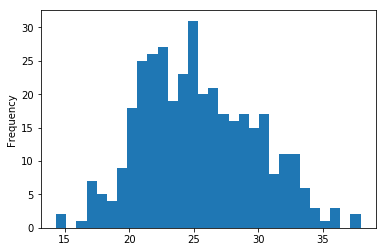

In [146]:
df['consumo_cerveja'].plot.hist(bins = 30)

In [92]:
df['consumo_cerveja'].describe()

count    365.000000
mean      25.401918
std        4.399091
min       14.340000
25%       22.010000
50%       24.870000
75%       28.630000
max       37.940000
Name: consumo_cerveja, dtype: float64

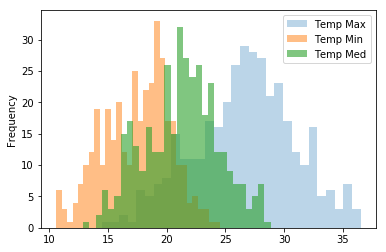

In [44]:
plt.figure()
df['max'].plot.hist(bins = 30,alpha = 0.3, label = 'Temp Max')
df['min'].plot.hist(bins = 30, alpha =0.5, label = 'Temp Min')
df['media'].plot.hist(bins = 30, alpha =0.6, label = 'Temp Med')
plt.legend()
plt.show()

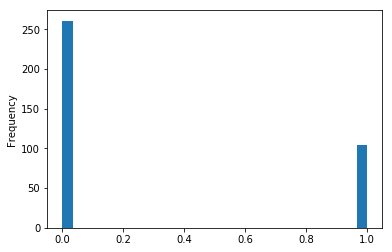

In [73]:
# Exemplo de distribuição binária
df['fds'].astype('int64').plot.hist(bins = 30)

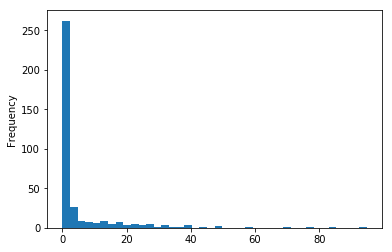

In [49]:
df.precipitacao.plot.hist(bins = 40)#log=  True)

##### Observando a kurtosis

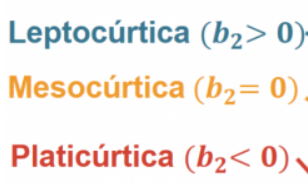

In [51]:
df.kurtosis()

media              -0.414111
min                -0.569543
max                -0.290332
precipitacao       17.808397
consumo_cerveja    -0.396501
dtype: float64

##### If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
##### If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
##### If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [53]:
df.skew()

media             -0.049255
min               -0.225035
max               -0.155435
precipitacao       3.780119
consumo_cerveja    0.270375
dtype: float64

### Visualização dos dados

#### Temperatura

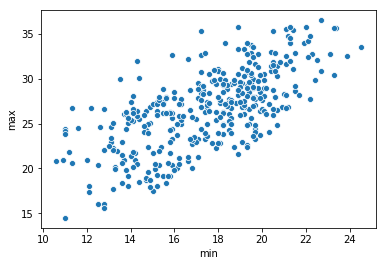

In [55]:
sns.scatterplot(x = 'min', y= 'max', data = df)

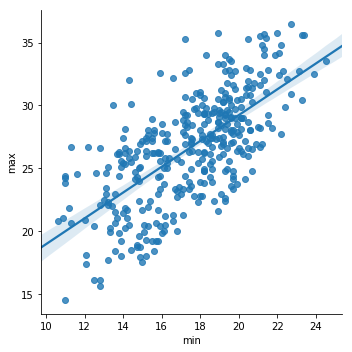

In [61]:
#Visualização com a Regressão
sns.lmplot(x = 'min', y= 'max', data = df)

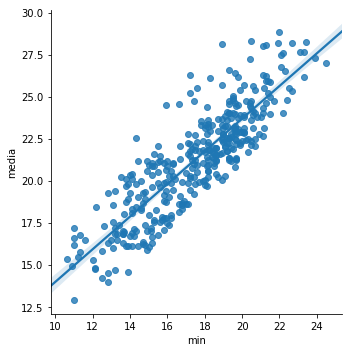

In [79]:
sns.lmplot(x = 'min', y= 'media', data = df)

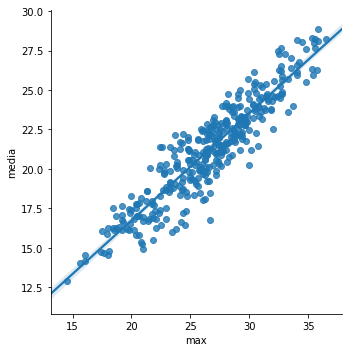

In [80]:
sns.lmplot(x = 'max', y= 'media', data = df)

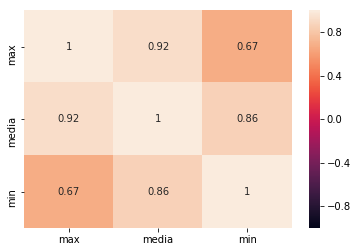

In [70]:
# Investigando correlacoes entre variaveis
sns.heatmap(data = df[['max', 'media', 'min']].corr(method = 'pearson'), vmax=1, vmin=-1, annot=True)

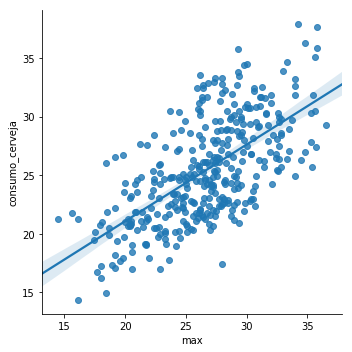

In [81]:
sns.lmplot(x = 'max', y= 'consumo_cerveja', data = df)

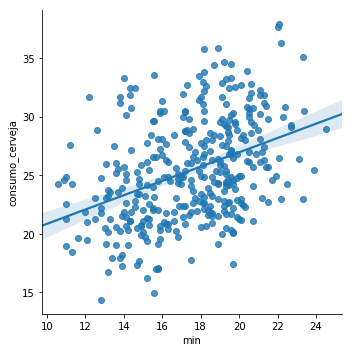

In [82]:
sns.lmplot(x = 'min', y= 'consumo_cerveja', data = df)

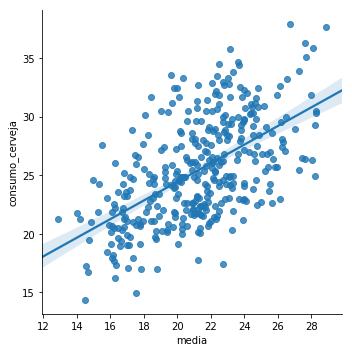

In [83]:
sns.lmplot(x = 'media', y= 'consumo_cerveja', data = df)

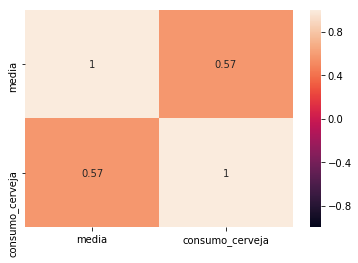

In [76]:
# Investigando correlacoes entre variaveis
sns.heatmap(data = df[['media', 'consumo_cerveja']].corr(method = 'pearson'), vmax=1, vmin=-1, annot=True)

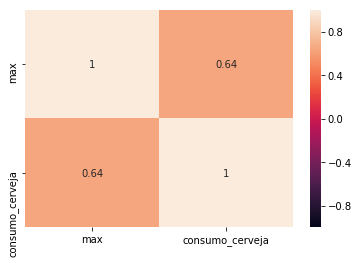

In [77]:
# Investigando correlacoes entre variaveis
sns.heatmap(data = df[['max', 'consumo_cerveja']].corr(method = 'pearson'), vmax=1, vmin=-1, annot=True)

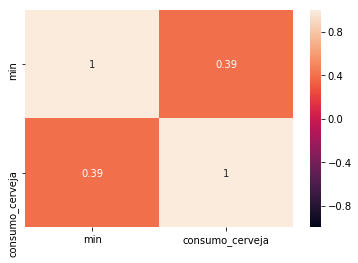

In [78]:
# Investigando correlacoes entre variaveis
sns.heatmap(data = df[['min', 'consumo_cerveja']].corr(method = 'pearson'), vmax=1, vmin=-1, annot=True)

#### Precipitação 

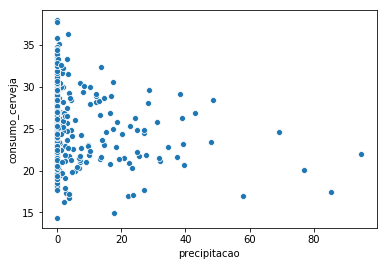

In [88]:
sns.scatterplot(x = 'precipitacao', y= 'consumo_cerveja', data = df)

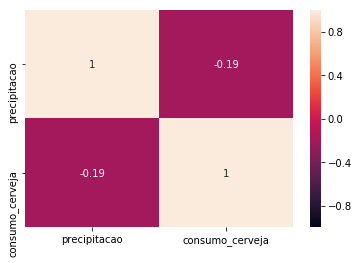

In [90]:
# Investigando correlacoes entre variaveis
sns.heatmap(data = df[['precipitacao', 'consumo_cerveja']].corr(method = 'pearson'), vmax=1, vmin=-1, annot=True)

#### Analisando o final de semana

In [106]:
# Para validar esta hipotese vamos verificar primeiro quantos dias de final de semana temos na base
# para isso vamos usar a função value counts
df.fds.value_counts()

0    261
1    104
Name: fds, dtype: int64

In [91]:
#vamos ver estatisticas sobre o consumo de cerveja em dias de semana e aos fins de semana
#para isso vamos usar a função groupby
df.groupby('fds')[['consumo_cerveja']].describe()

consumo_cerveja                                                       \
              count       mean       std    min     25%     50%      75%   
fds                                                                        
0             261.0  23.998736  3.787464  14.34  21.330  23.610  26.3600   
1             104.0  28.923365  3.830018  20.74  26.045  29.485  31.8325   

            
       max  
fds         
0    35.86  
1    37.94

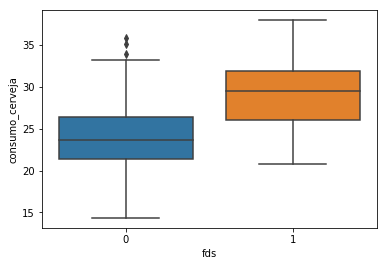

In [113]:
#Vamos plotar o boxplot do consumo de cerevja aos dias de semana e aos finais de semana
sns.boxplot(x = 'fds', y = 'consumo_cerveja', data = df)

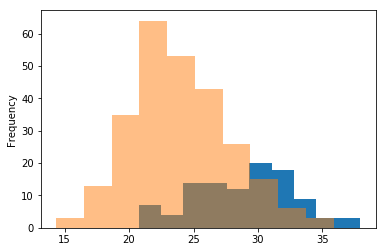

In [18]:
#Vamos plotar os histogramas do consumo de cerveja
df[df['fds'] == 1]['consumo_cerveja'].plot(kind = 'hist')# density = True)
df[df['fds'] == 0]['consumo_cerveja'].plot(kind = 'hist',alpha = 0.5) #density = True)

### Criando uma categoria com o consumo de cerveja

In [95]:
df['consumo_percentil'] = pd.cut(df['consumo_cerveja'],
                                 bins = (0,22, 25, 29 ,38),
                                 labels = ('até 22', '22 a 25', '25 a 29', '29 +'))

In [96]:
df['consumo_percentil'].value_counts()

22 a 25    97
25 a 29    95
até 22     91
29 +       82
Name: consumo_percentil, dtype: int64

In [111]:
aux = pd.DataFrame(df.groupby(['consumo_percentil'])['fds'].value_counts())
aux = aux.rename(columns = {'fds': 'contagem'}).reset_index()

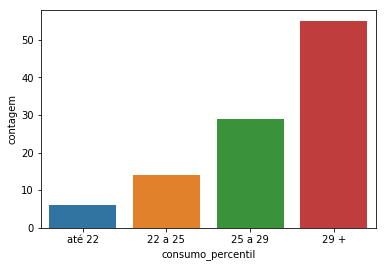

In [113]:
sns.barplot(x = 'consumo_percentil', y = 'contagem', data = aux[aux['fds'] == 1] )

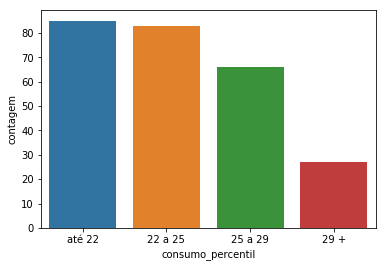

In [114]:
sns.barplot(x = 'consumo_percentil', y = 'contagem', data = aux[aux['fds'] == 0] )

#### Verificando o consumo de cerveja ao longo do tempo

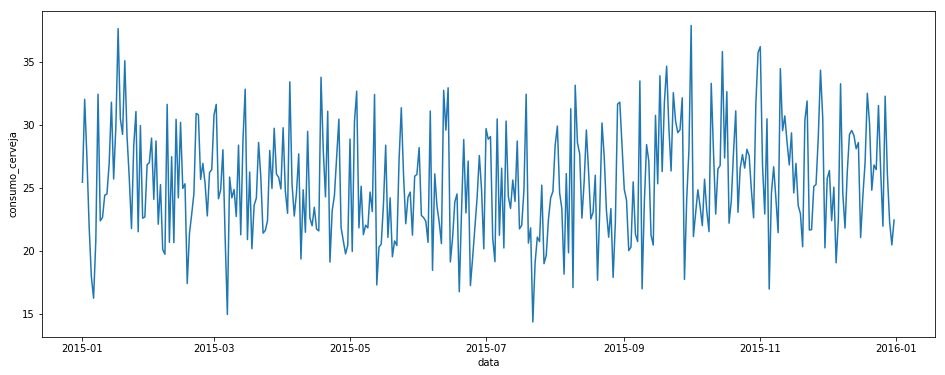

In [256]:
plt.figure(figsize = (16,6))
sns.lineplot(x = 'data', y = 'consumo_cerveja', data= df)

#### Vamos criar variaveis temporais

In [240]:
#Vamos quebrar a data em dia mes e ano
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day

In [241]:
aux = pd.DataFrame(df.groupby('mes')['consumo_percentil'].value_counts())
aux = aux.rename(columns = {'consumo_percentil': 'contagem'}).reset_index()

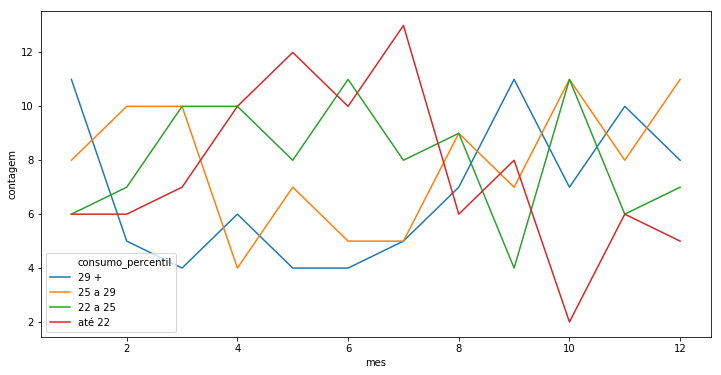

In [242]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'mes', y= 'contagem', hue = 'consumo_percentil', data = aux)

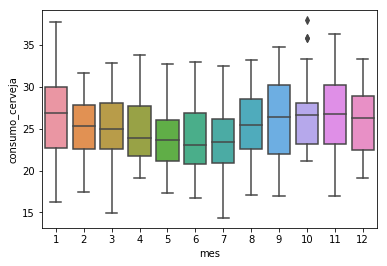

In [123]:
sns.boxplot(x = 'mes', y = 'consumo_cerveja', data = df)

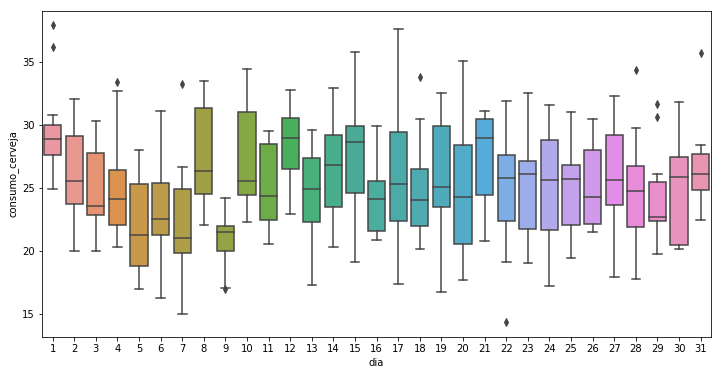

In [125]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'dia', y = 'consumo_cerveja', data = df)

#### Vamos criar a variavel dia da semana

In [126]:
#Vamos criar a variavel dia da semana
df['diadasemana'] = df['data'].dt.dayofweek

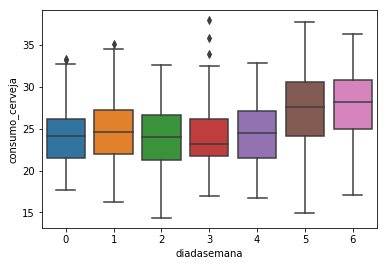

In [129]:
sns.boxplot(x = 'diadasemana', y = 'consumo_cerveja', data = df)

O mês é:  1
media:  26.527741935483867


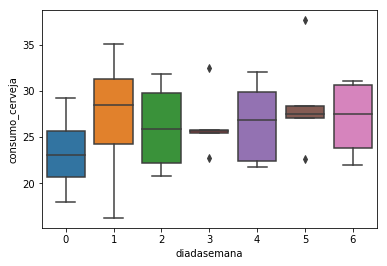

O mês é:  2
media:  25.225714285714282


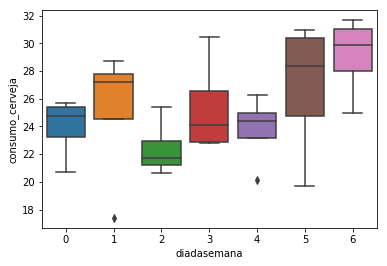

O mês é:  3
media:  25.141290322580645


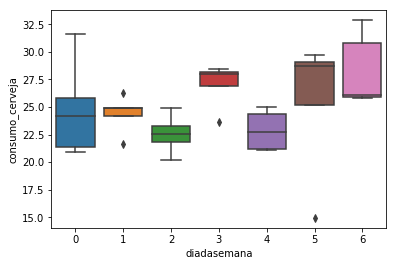

O mês é:  4
media:  24.758666666666674


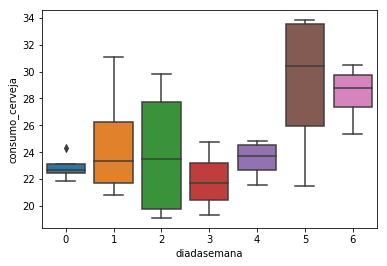

O mês é:  5
media:  24.181290322580644


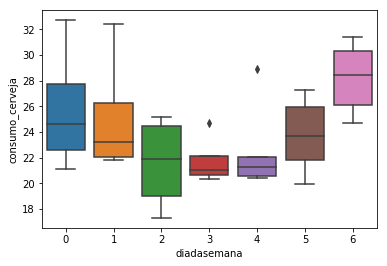

O mês é:  6
media:  23.90266666666667


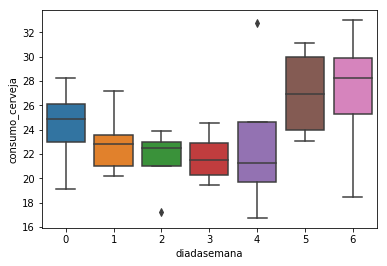

O mês é:  7
media:  23.76870967741936


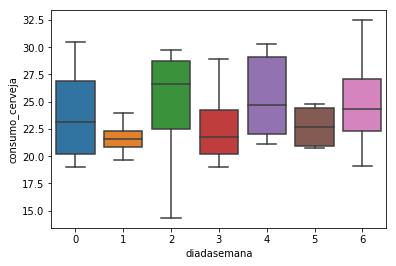

O mês é:  8
media:  25.234838709677422


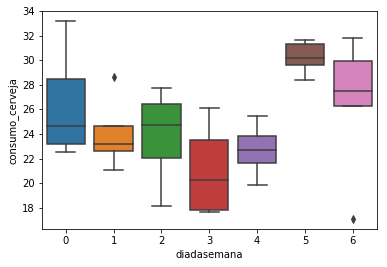

O mês é:  9
media:  26.38733333333333


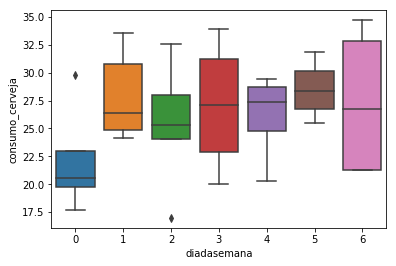

O mês é:  10
media:  26.970645161290324


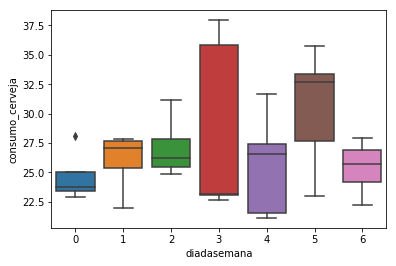

O mês é:  11
media:  26.628666666666664


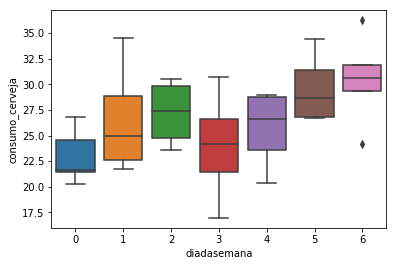

O mês é:  12
media:  26.080645161290327


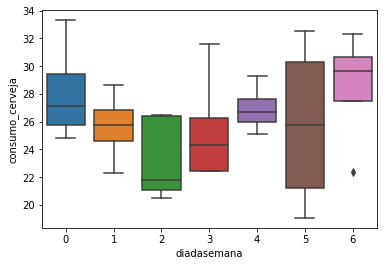

In [140]:
#Verificando se o dia da semana muda ao longo dos meses
for meses in df['mes'].unique():
    print("O mês é: ", meses)
    print('media: ', df[df['mes'] == meses]['consumo_cerveja'].mean())
    sns.boxplot(x= 'diadasemana', y= 'consumo_cerveja', data = df[df['mes'] == meses])
    plt.show()

O mês é:  1


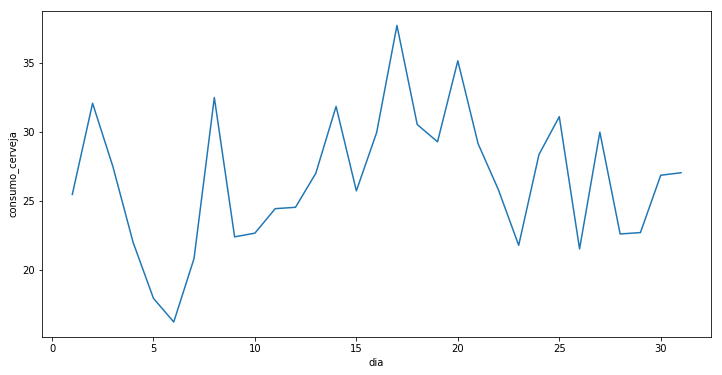

O mês é:  2


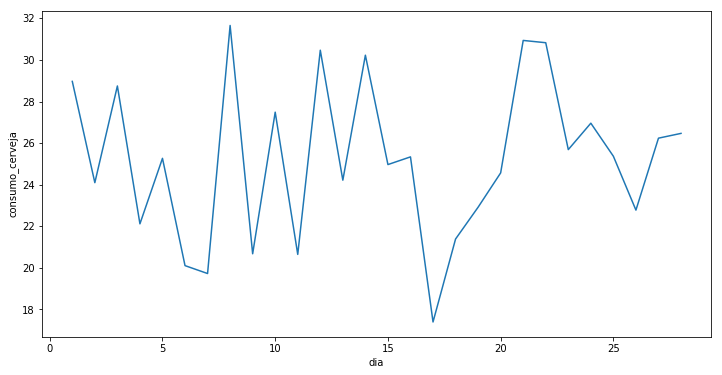

O mês é:  3


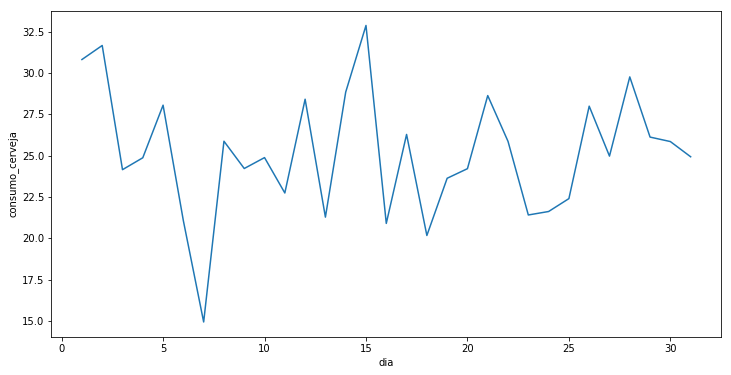

O mês é:  4


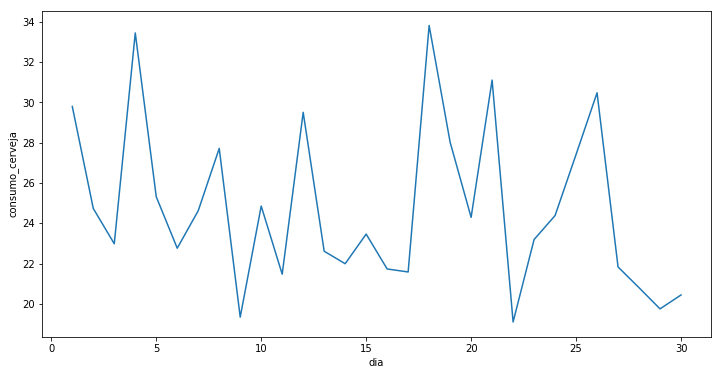

O mês é:  5


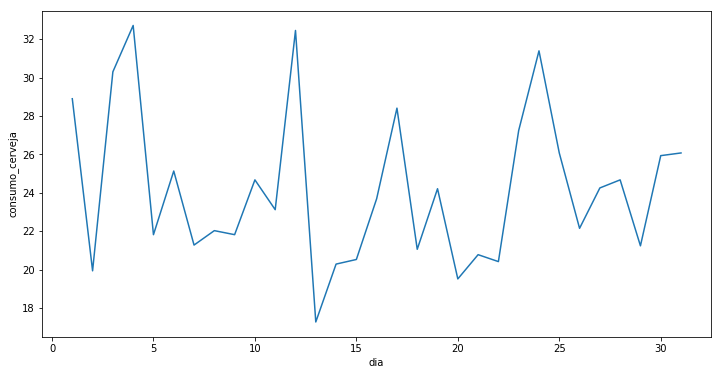

O mês é:  6


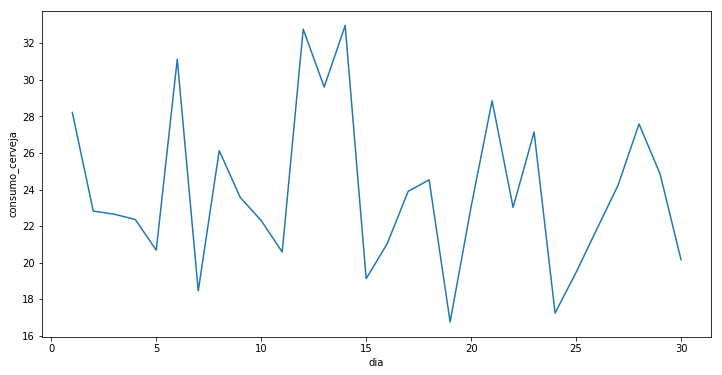

O mês é:  7


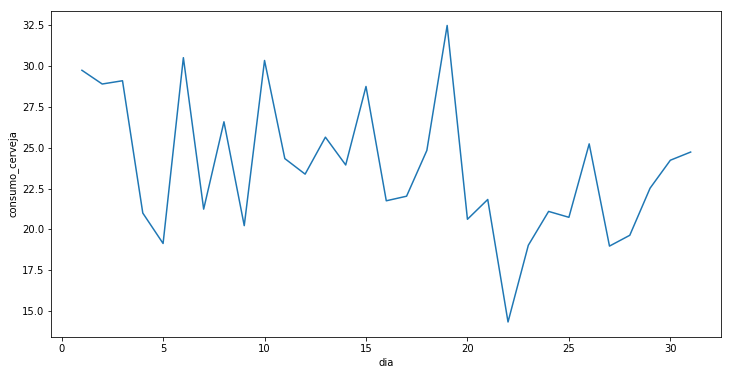

O mês é:  8


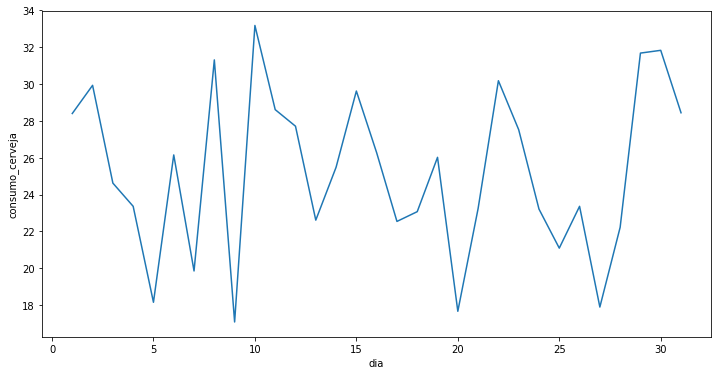

O mês é:  9


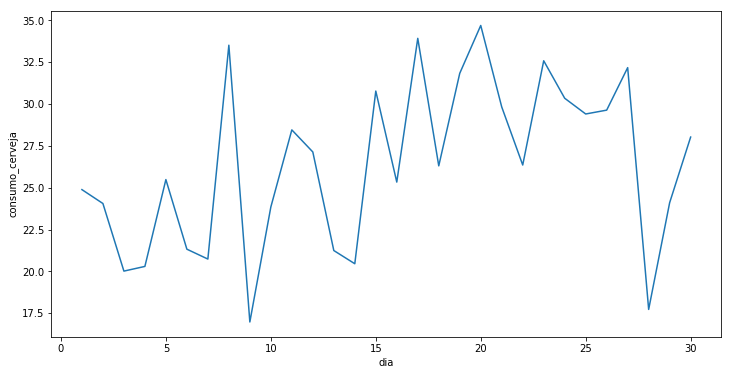

O mês é:  10


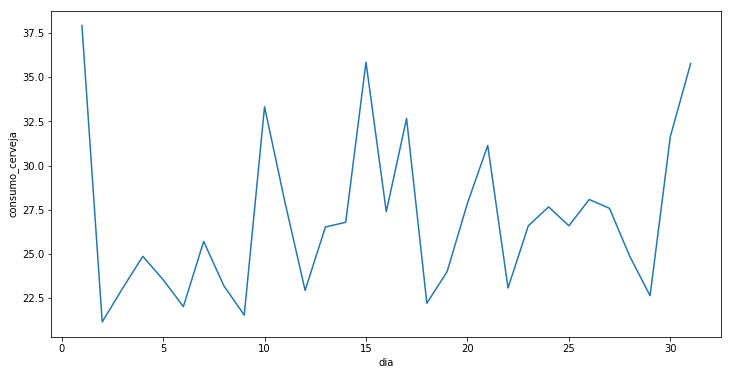

O mês é:  11


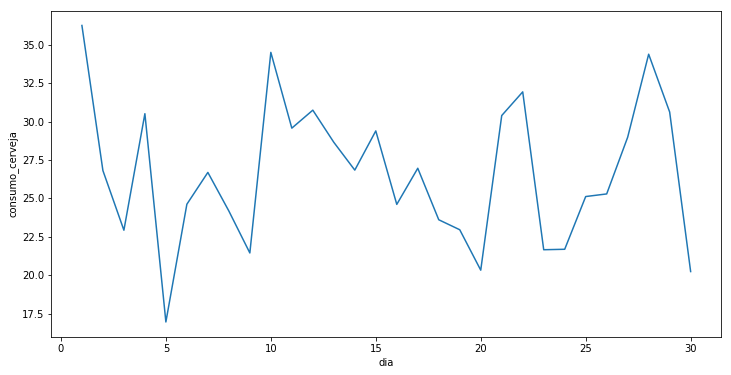

O mês é:  12


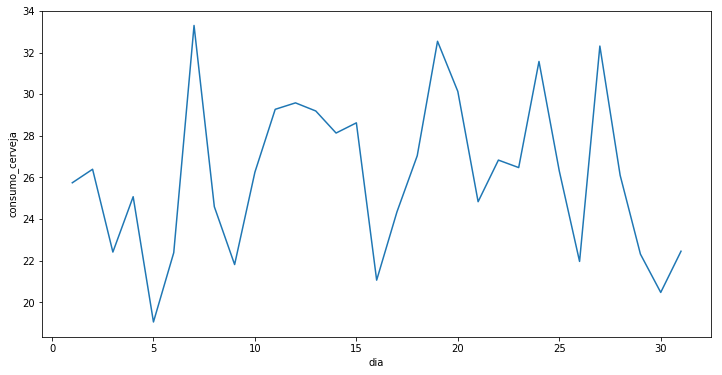

In [257]:
for meses in df['mes'].unique():
    print("O mês é: ", meses)
    plt.figure(figsize = (12,6))
    sns.lineplot(x= 'dia', y= 'consumo_cerveja', data = df[df['mes'] == meses])
    plt.show()

### Criando variavel periodo do mês

In [141]:
df['periodo_mes'] = ['inicio_mes' if x < 15 else 'final_mes' for x in df['dia']]

In [142]:
df.head()

,data,media,min,max,precipitacao,fds,consumo_cerveja,consumo_percentil,ano,mes,dia,diadasemana,periodo_mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.46,25 a 29,2015,1,1,3,inicio_mes
1,2015-02-01,27.02,24.5,33.5,0.0,0,28.97,25 a 29,2015,2,1,6,inicio_mes
2,2015-03-01,24.82,22.4,29.9,0.0,1,30.81,29 +,2015,3,1,6,inicio_mes
3,2015-04-01,23.98,21.5,28.6,1.2,1,29.80,29 +,2015,4,1,2,inicio_mes
4,2015-05-01,23.82,21.0,28.3,0.0,0,28.90,25 a 29,2015,5,1,4,inicio_mes


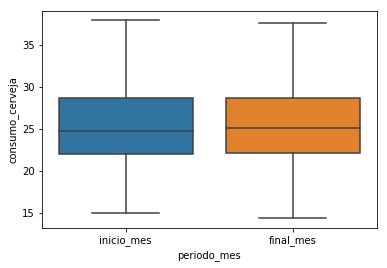

In [143]:
sns.boxplot(x = 'periodo_mes', y = 'consumo_cerveja', data = df)

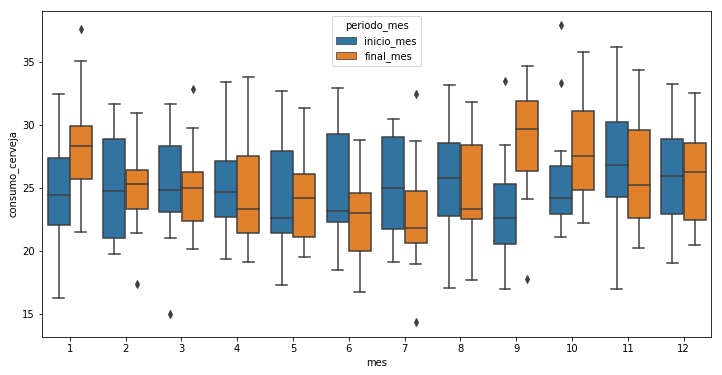

In [245]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'mes', y = 'consumo_cerveja', data = df, hue = 'periodo_mes')

### Criando a variavel binaria para chuva

In [145]:
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'consumo_percentil', 'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes'],
      dtype='object')

In [146]:
df['chuva'] = ['chuveu' if x > 0 else 'nao_choveu' for x in df['precipitacao']]

In [151]:
df['chuva'].value_counts()

nao_choveu    218
chuveu        147
Name: chuva, dtype: int64

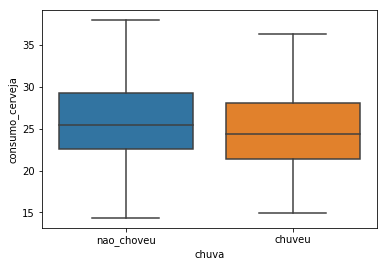

In [147]:
sns.boxplot(x = 'chuva', y = 'consumo_cerveja', data = df)

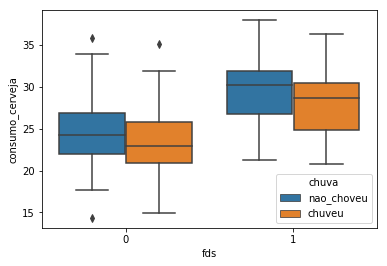

In [148]:
#Verificando a chuva no final de semana
sns.boxplot(x = 'fds', y= 'consumo_cerveja', data= df, hue = 'chuva')

O mês é:  1


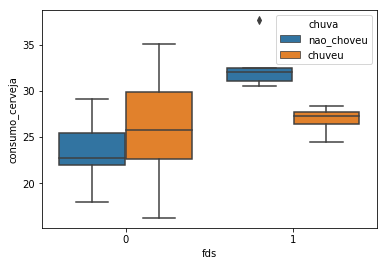

O mês é:  2


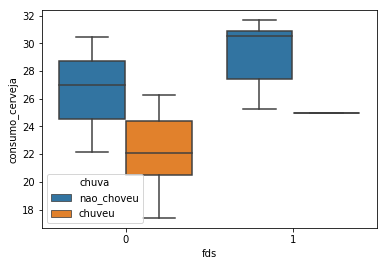

O mês é:  3


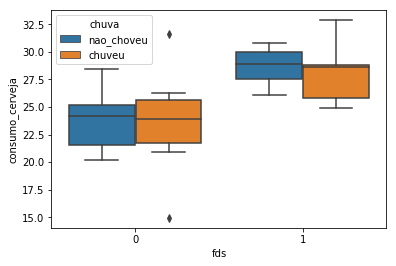

O mês é:  4


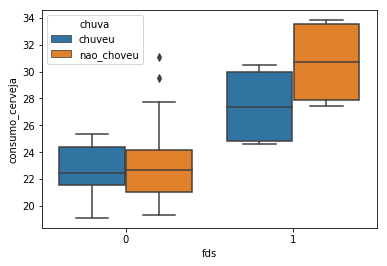

O mês é:  5


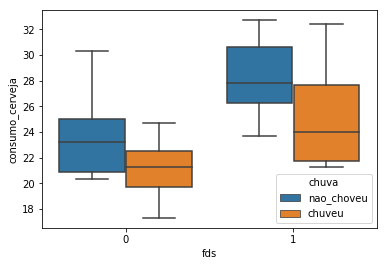

O mês é:  6


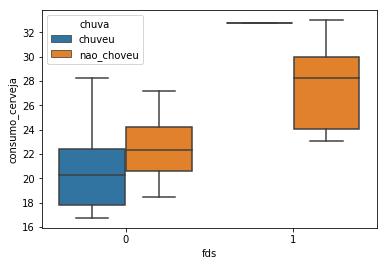

O mês é:  7


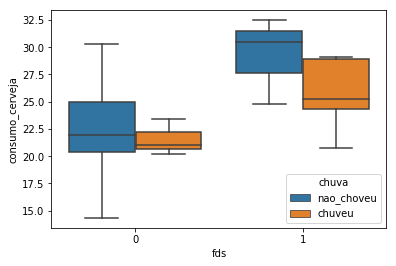

O mês é:  8


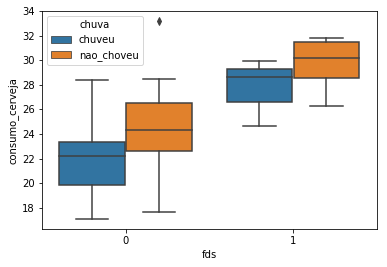

O mês é:  9


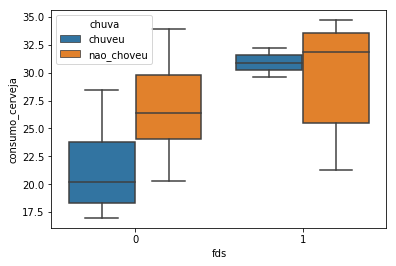

O mês é:  10


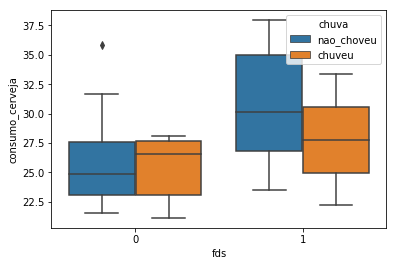

O mês é:  11


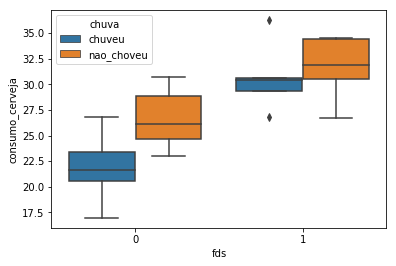

O mês é:  12


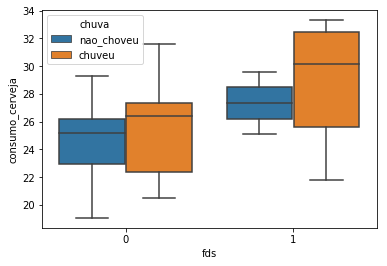

In [259]:
for meses in df['mes'].unique():
    print("O mês é: ", meses)
    sns.boxplot(x = 'fds', y= 'consumo_cerveja', hue = 'chuva', data = df[df['mes'] == meses])
    plt.show()

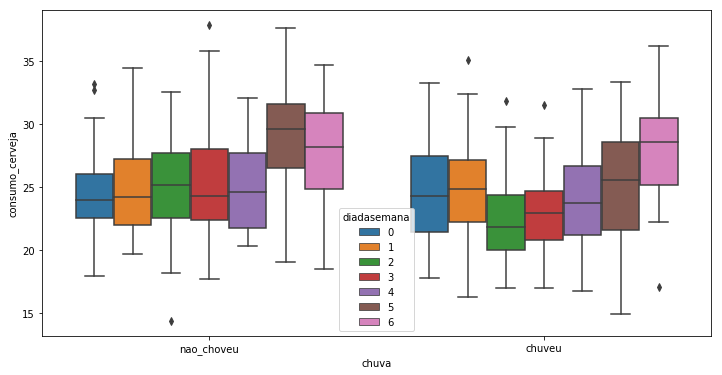

In [150]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'chuva', y= 'consumo_cerveja', data= df, hue = 'diadasemana')

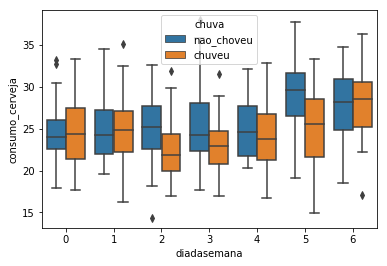

In [208]:
sns.boxplot(x = 'diadasemana', y = 'consumo_cerveja', hue = 'chuva', data = df)

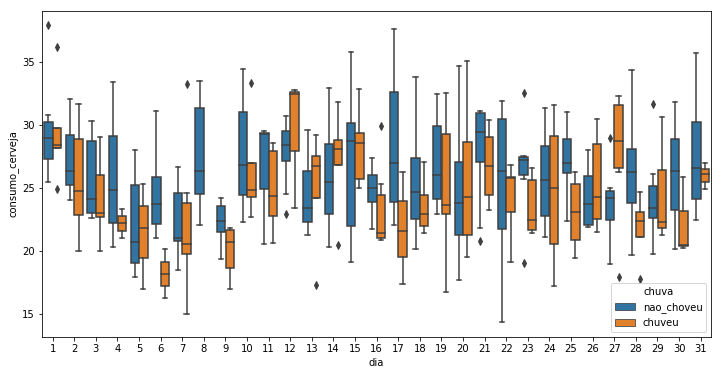

In [250]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'dia', y = 'consumo_cerveja', data = df, hue = 'chuva')

In [251]:
df.groupby('dia')['chuva'].value_counts()

dia  chuva     
1    nao_choveu     7
     chuveu         5
2    chuveu         9
     nao_choveu     3
3    chuveu         7
     nao_choveu     5
4    nao_choveu    10
     chuveu         2
5    nao_choveu     9
     chuveu         3
6    nao_choveu    10
     chuveu         2
7    chuveu         6
     nao_choveu     6
8    nao_choveu    12
9    chuveu         7
     nao_choveu     5
10   nao_choveu     8
     chuveu         4
11   chuveu         9
     nao_choveu     3
12   nao_choveu     9
     chuveu         3
13   nao_choveu     8
     chuveu         4
14   nao_choveu     7
     chuveu         5
15   nao_choveu     7
     chuveu         5
16   chuveu         6
                   ..
17   nao_choveu     9
     chuveu         3
18   nao_choveu     8
     chuveu         4
19   nao_choveu     7
     chuveu         5
20   chuveu         6
     nao_choveu     6
21   nao_choveu     8
     chuveu         4
22   nao_choveu     7
     chuveu         5
23   chuveu         6
     nao_choveu 

### Criando variaveis com 7 dias anteriores

In [154]:
def get_dia_anterior(df, qtdeDiaAnterior, coluna):
    df = df.set_index(["data"])
    df = df.sort_index()
    df['QtdeDia -'+str(coluna)+str(qtdeDiaAnterior)] = df[coluna].shift(qtdeDiaAnterior)
    df = df.reset_index()        
    return df   

In [155]:
coluna = 'consumo_cerveja'
for i in range(1,8): 
    df = get_dia_anterior(df, i, coluna)

In [166]:
colunas = ['QtdeDia -consumo_cerveja1', 'QtdeDia -consumo_cerveja2',
       'QtdeDia -consumo_cerveja3', 'QtdeDia -consumo_cerveja4',
       'QtdeDia -consumo_cerveja5', 'QtdeDia -consumo_cerveja6',
       'QtdeDia -consumo_cerveja7', 'consumo_cerveja']

A coluna é : QtdeDia -consumo_cerveja1


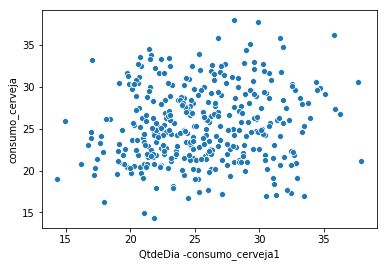

A coluna é : QtdeDia -consumo_cerveja2


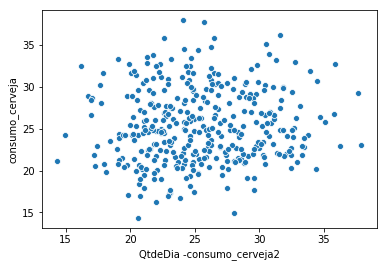

A coluna é : QtdeDia -consumo_cerveja3


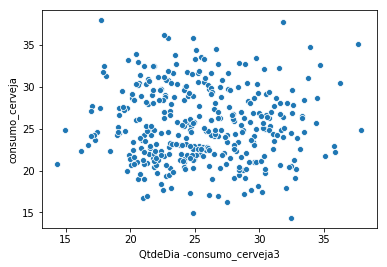

A coluna é : QtdeDia -consumo_cerveja4


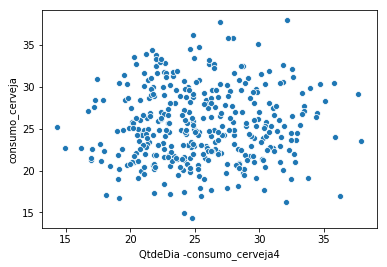

A coluna é : QtdeDia -consumo_cerveja5


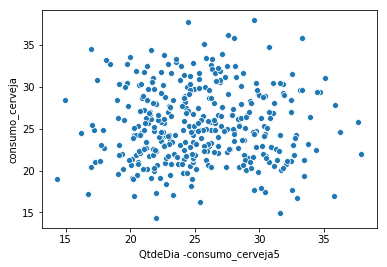

A coluna é : QtdeDia -consumo_cerveja6


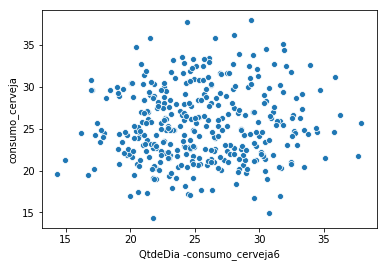

A coluna é : QtdeDia -consumo_cerveja7


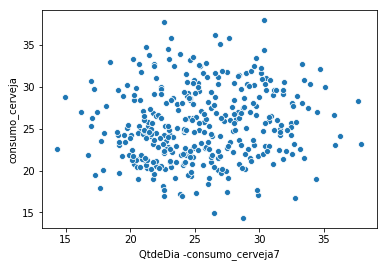

A coluna é : consumo_cerveja


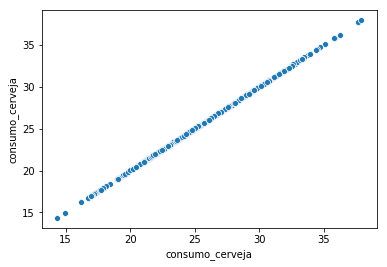

In [175]:
for coluna in colunas:
    print("A coluna é :", coluna)
    sns.scatterplot(x = coluna, y= 'consumo_cerveja', data = df)
    plt.show()

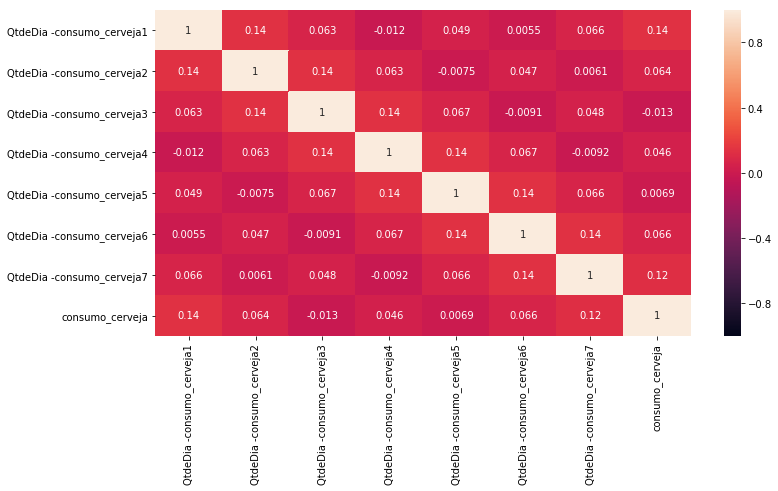

In [173]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df[colunas].corr(), vmin = -1, vmax = 1, annot = True)

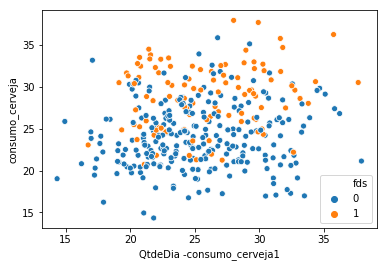

In [194]:
sns.scatterplot(x = 'QtdeDia -consumo_cerveja1', y = 'consumo_cerveja', hue = 'fds', data = df)

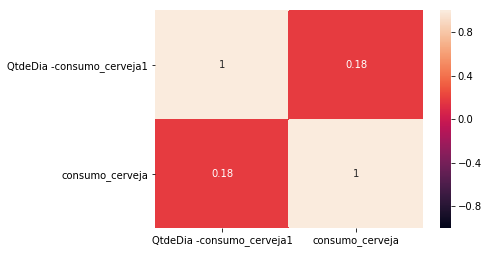

In [200]:
aux = df[df['fds'] == 1]
sns.heatmap(data = aux[['QtdeDia -consumo_cerveja1', 'consumo_cerveja']].corr(), vmin = -1, vmax = 1, annot = True)

### Temperatura

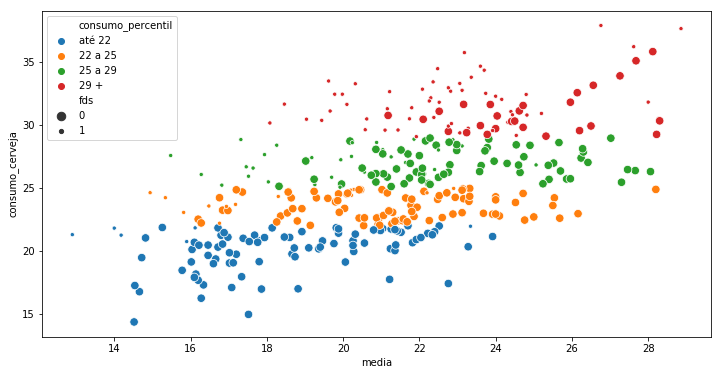

In [180]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'media', y = 'consumo_cerveja', data = df, hue = 'consumo_percentil', size = 'fds')

In [209]:
df['media'].mean()

21.226356164383578

In [210]:
df['media_binaria'] = ['acima'if x > 21 else 'abaixo' for x in df['media']]

In [214]:
df['media_binaria'].value_counts()

acima     207
abaixo    158
Name: media_binaria, dtype: int64

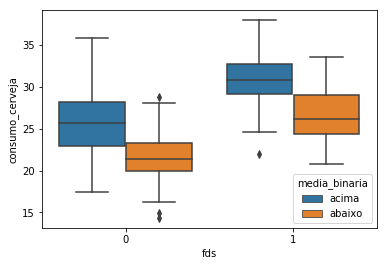

In [212]:
sns.boxplot(x = 'fds', y = 'consumo_cerveja', hue = 'media_binaria', data = df)

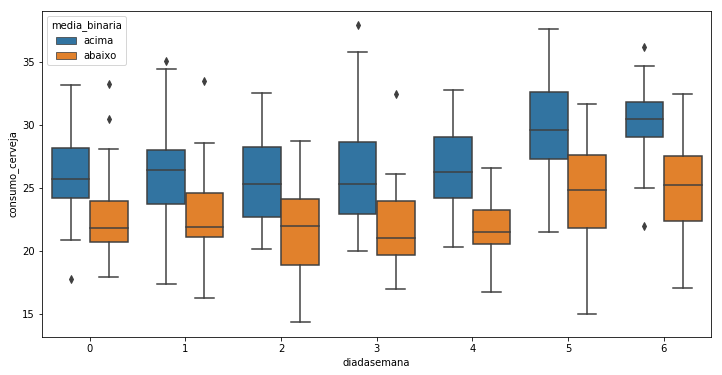

In [247]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'diadasemana', y = 'consumo_cerveja', hue = 'media_binaria', data = df)

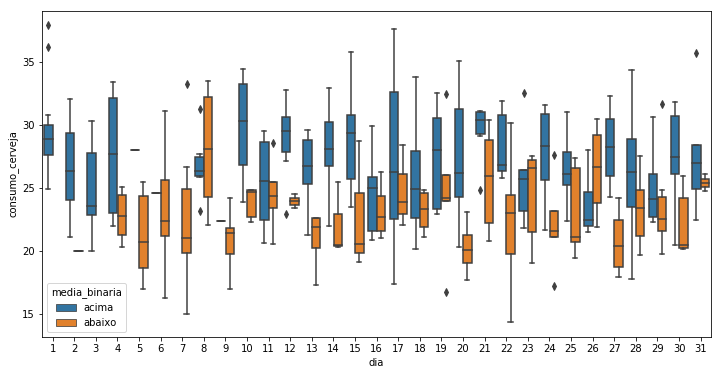

In [253]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'dia', y = 'consumo_cerveja', data = df, hue = 'media_binaria')

In [254]:
df.groupby('dia')['media_binaria'].value_counts()

dia  media_binaria
1    acima            12
2    acima            11
     abaixo            1
3    acima            12
4    abaixo            6
     acima             6
5    abaixo           11
     acima             1
6    abaixo           11
     acima             1
7    abaixo           12
8    abaixo            6
     acima             6
9    abaixo           11
     acima             1
10   acima             7
     abaixo            5
11   acima             8
     abaixo            4
12   acima            10
     abaixo            2
13   acima             8
     abaixo            4
14   acima             9
     abaixo            3
15   acima             9
     abaixo            3
16   acima             8
     abaixo            4
17   acima             9
     abaixo            3
18   acima             8
     abaixo            4
19   acima             7
     abaixo            5
20   acima             8
     abaixo            4
21   abaixo            6
     acima             6
22   a

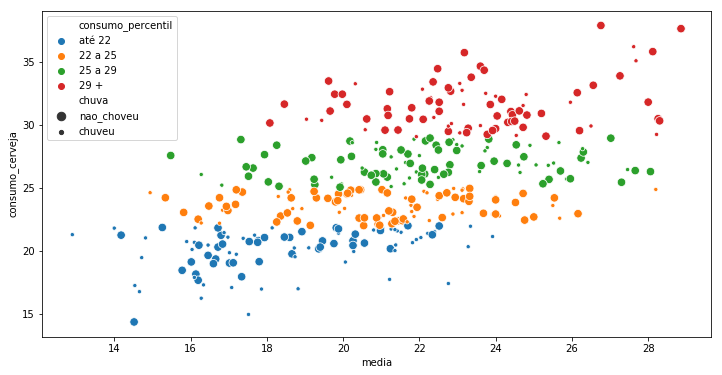

In [183]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'media', y = 'consumo_cerveja', data = df, hue = 'consumo_percentil', size = 'chuva')

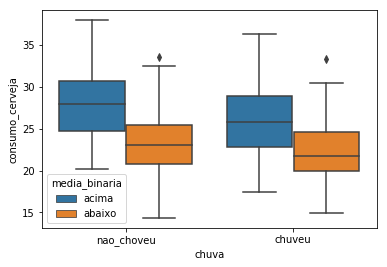

In [217]:
sns.boxplot(x = 'chuva', y = 'consumo_cerveja', hue = 'media_binaria', data= df)

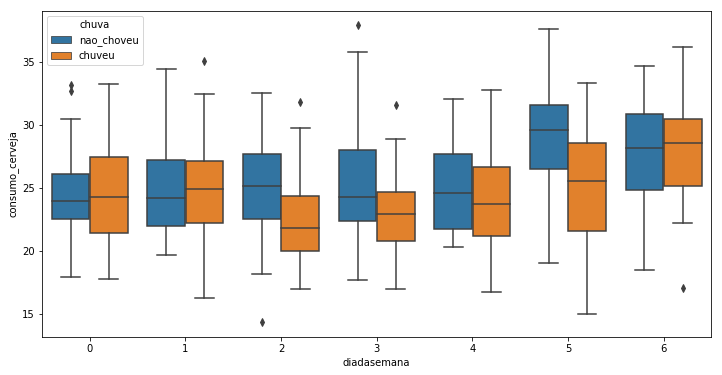

In [249]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'diadasemana', y = 'consumo_cerveja', hue = 'chuva', data = df)

In [219]:
df.columns

Index(['data', 'media', 'min', 'max', 'precipitacao', 'fds', 'consumo_cerveja',
       'consumo_percentil', 'ano', 'mes', 'dia', 'diadasemana', 'periodo_mes',
       'chuva', 'QtdeDia -consumo_cerveja1', 'QtdeDia -consumo_cerveja2',
       'QtdeDia -consumo_cerveja3', 'QtdeDia -consumo_cerveja4',
       'QtdeDia -consumo_cerveja5', 'QtdeDia -consumo_cerveja6',
       'QtdeDia -consumo_cerveja7', 'media_binaria'],
      dtype='object')

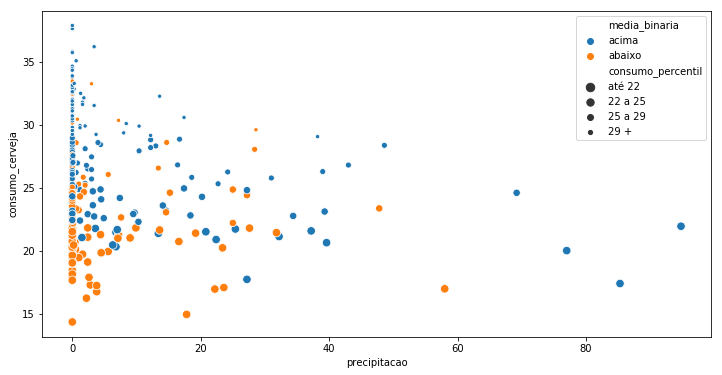

In [220]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'precipitacao', y = 'consumo_cerveja', data = df, hue = 'media_binaria', 
                size = 'consumo_percentil')

#### Final de semana, consumo de cerveja e chuva

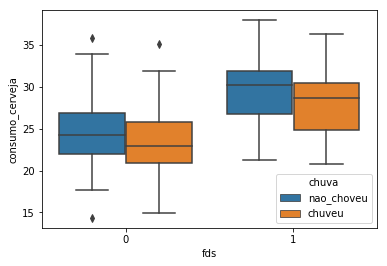

In [206]:
sns.boxplot(x = 'fds', y = 'consumo_cerveja', hue = 'chuva', data = df)

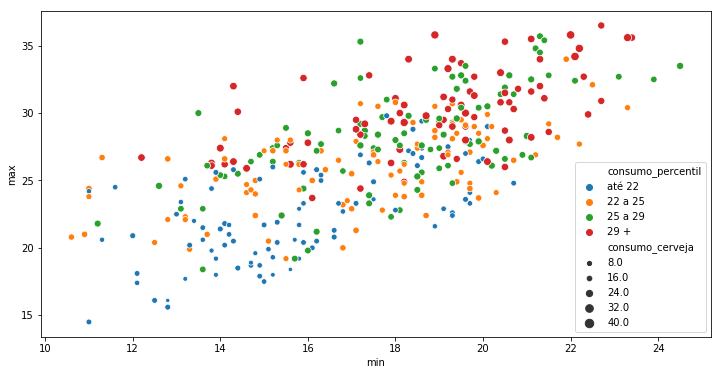

In [225]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'min', y = 'max', size = 'consumo_cerveja', hue = 'consumo_percentil', data = df)